# Actividad: Descomposición de Series Temporales

## Objetivo
En este notebook aprenderemos a:
1. Cargar y explorar una serie temporal de viajes de Cityscoot
2. Visualizar la serie completa para identificar patrones visuales
3. Aplicar descomposición aditiva usando `statsmodels`
4. Analizar e interpretar los componentes: tendencia, estacionalidad y residuos

---

## 1. Importación de Librerías

**¿Qué vamos a usar?**
- `pandas`: Para manipulación y análisis de datos tabulares
- `numpy`: Para operaciones numéricas eficientes
- `matplotlib`: Para crear visualizaciones
- `statsmodels`: Librería especializada en análisis estadístico y series temporales

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejorar la visualización de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de Datos

**Paso importante:** Cargar los datos y asegurarnos de que la columna de fecha esté en el formato correcto.

**¿Por qué es importante el formato de fecha?**
- Pandas necesita reconocer las fechas como tipo `datetime` para realizar operaciones temporales
- Esto nos permite usar funcionalidades como indexación temporal, resampling, etc.

In [2]:
# Cargamos el dataset
df = pd.read_csv('../data/cityscoot_daily_rides.csv')

# Convertimos la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Establecemos 'fecha' como índice (esto es fundamental para series temporales)
df.set_index('fecha', inplace=True)

print("📊 Información del dataset:")
print(f"- Período: desde {df.index.min()} hasta {df.index.max()}")
print(f"- Total de días: {len(df)}")
print(f"- Columnas disponibles: {list(df.columns)}")
print("\n")

# Mostramos las primeras filas
print("Primeras 5 observaciones:")
df.head()

📊 Información del dataset:
- Período: desde 2023-01-01 00:00:00 hasta 2023-12-31 00:00:00
- Total de días: 365
- Columnas disponibles: ['viajes', 'temp_media', 'lluvia', 'eventos', 'marketing_spend']


Primeras 5 observaciones:


,viajes,temp_media,lluvia,eventos,marketing_spend
fecha,,,,,
2023-01-01,579,19.6,0,1,2533
2023-01-02,371,20.7,1,0,2460
2023-01-03,489,20.5,0,0,2868
2023-01-04,415,20.8,0,0,2384
2023-01-05,382,19.7,0,1,2607


## 3. Exploración Inicial de Datos

Antes de analizar la serie temporal, es importante entender:
- Las estadísticas descriptivas de los viajes
- Si hay valores faltantes
- La distribución de los datos

In [3]:
# Estadísticas descriptivas de la variable 'viajes'
print("📈 Estadísticas de la variable 'viajes':")
print(df['viajes'].describe())
print("\n")

# Verificamos si hay valores faltantes
print("🔍 Valores faltantes por columna:")
print(df.isnull().sum())
print("\n")

# Información general
print("ℹ️ Información del DataFrame:")
df.info()

📈 Estadísticas de la variable 'viajes':
count    365.000000
mean     582.134247
std      155.678843
min      157.000000
25%      476.000000
50%      570.000000
75%      704.000000
max      965.000000
Name: viajes, dtype: float64


🔍 Valores faltantes por columna:
viajes             0
temp_media         0
lluvia             0
eventos            0
marketing_spend    0
dtype: int64


ℹ️ Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   viajes           365 non-null    int64  
 1   temp_media       365 non-null    float64
 2   lluvia           365 non-null    int64  
 3   eventos          365 non-null    int64  
 4   marketing_spend  365 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


## 4. Visualización de la Serie Temporal Completa

**¿Qué buscamos en esta visualización?**

1. **Tendencia**: ¿Los viajes aumentan, disminuyen o se mantienen estables a lo largo del tiempo?
2. **Estacionalidad**: ¿Hay patrones que se repiten regularmente (diarios, semanales, mensuales)?
3. **Variabilidad**: ¿Qué tan dispersos están los datos?
4. **Valores atípicos**: ¿Hay picos o caídas inusuales?

Esta visualización inicial es crucial para formular hipótesis sobre el comportamiento de la serie.

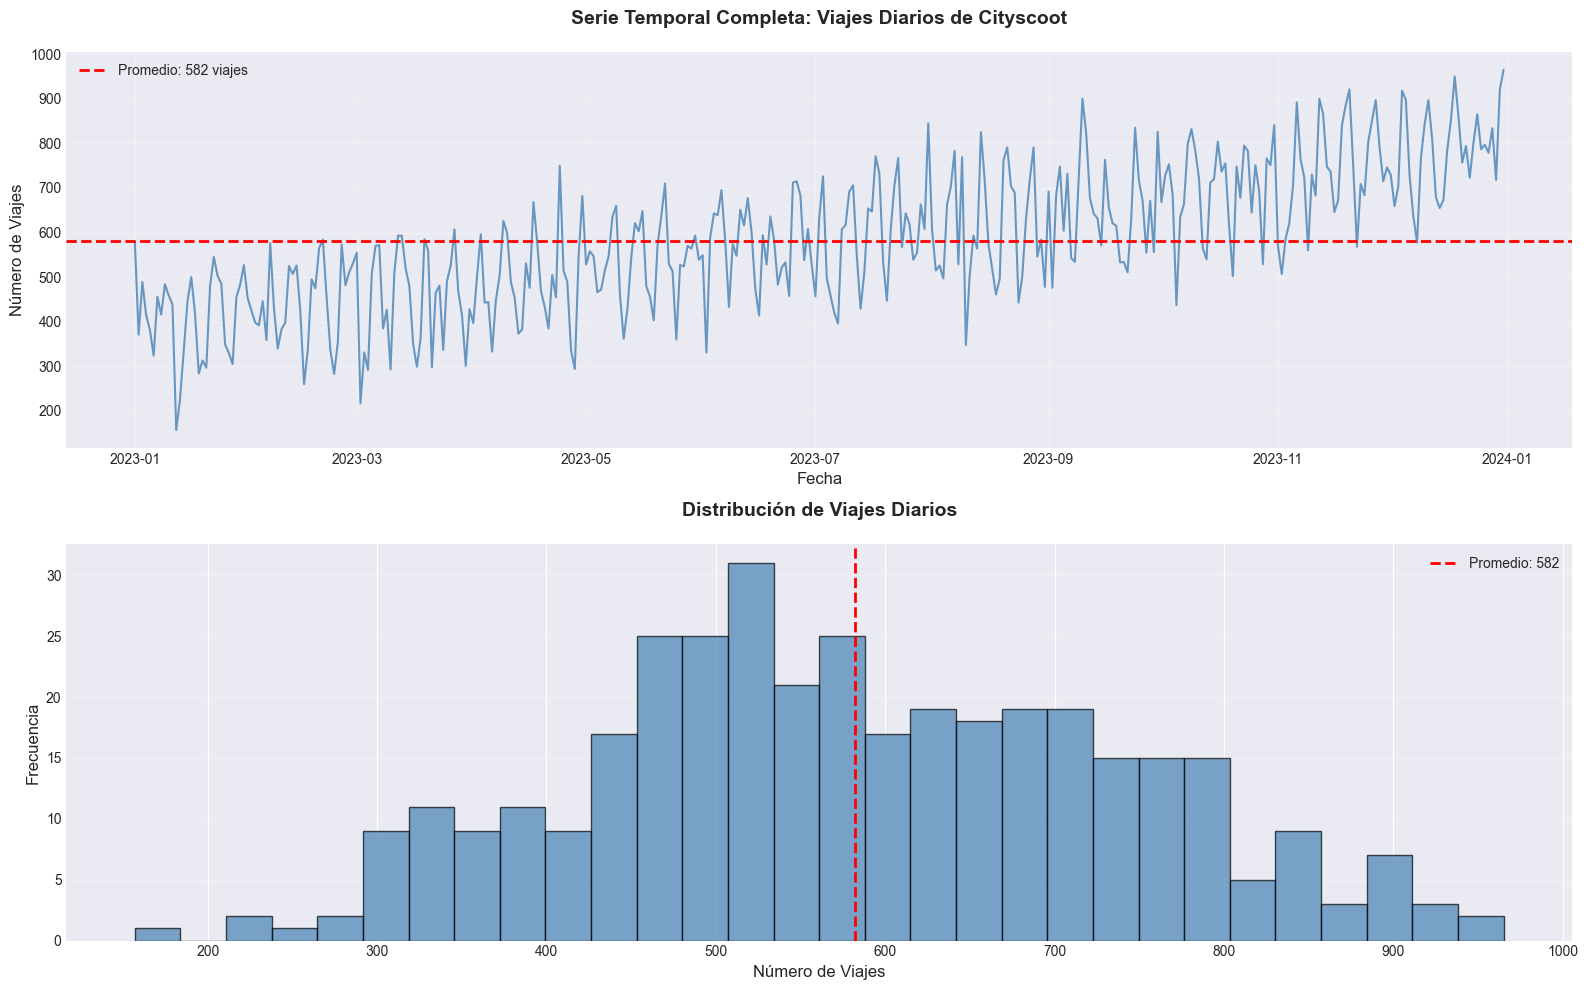


📊 Observaciones iniciales:
- Promedio de viajes diarios: 582.13
- Desviación estándar: 155.68
- Viajes mínimos: 157 en 2023-01-12
- Viajes máximos: 965 en 2023-12-31


In [4]:
# Creamos una figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Serie temporal completa
axes[0].plot(df.index, df['viajes'], linewidth=1.5, color='steelblue', alpha=0.8)
axes[0].set_title('Serie Temporal Completa: Viajes Diarios de Cityscoot', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Fecha', fontsize=12)
axes[0].set_ylabel('Número de Viajes', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Añadimos una línea de promedio para referencia
promedio = df['viajes'].mean()
axes[0].axhline(y=promedio, color='red', linestyle='--', 
                linewidth=2, label=f'Promedio: {promedio:.0f} viajes')
axes[0].legend(loc='upper left', fontsize=10)

# Gráfico 2: Histograma de distribución
axes[1].hist(df['viajes'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=promedio, color='red', linestyle='--', 
                linewidth=2, label=f'Promedio: {promedio:.0f}')
axes[1].set_title('Distribución de Viajes Diarios', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Número de Viajes', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Observaciones iniciales:")
print(f"- Promedio de viajes diarios: {promedio:.2f}")
print(f"- Desviación estándar: {df['viajes'].std():.2f}")
print(f"- Viajes mínimos: {df['viajes'].min()} en {df['viajes'].idxmin().strftime('%Y-%m-%d')}")
print(f"- Viajes máximos: {df['viajes'].max()} en {df['viajes'].idxmax().strftime('%Y-%m-%d')}")

## 5. Análisis de Patrones Semanales y Mensuales

Antes de la descomposición formal, exploremos algunos patrones:
- ¿Hay diferencias entre días de la semana?
- ¿Hay variación mensual?

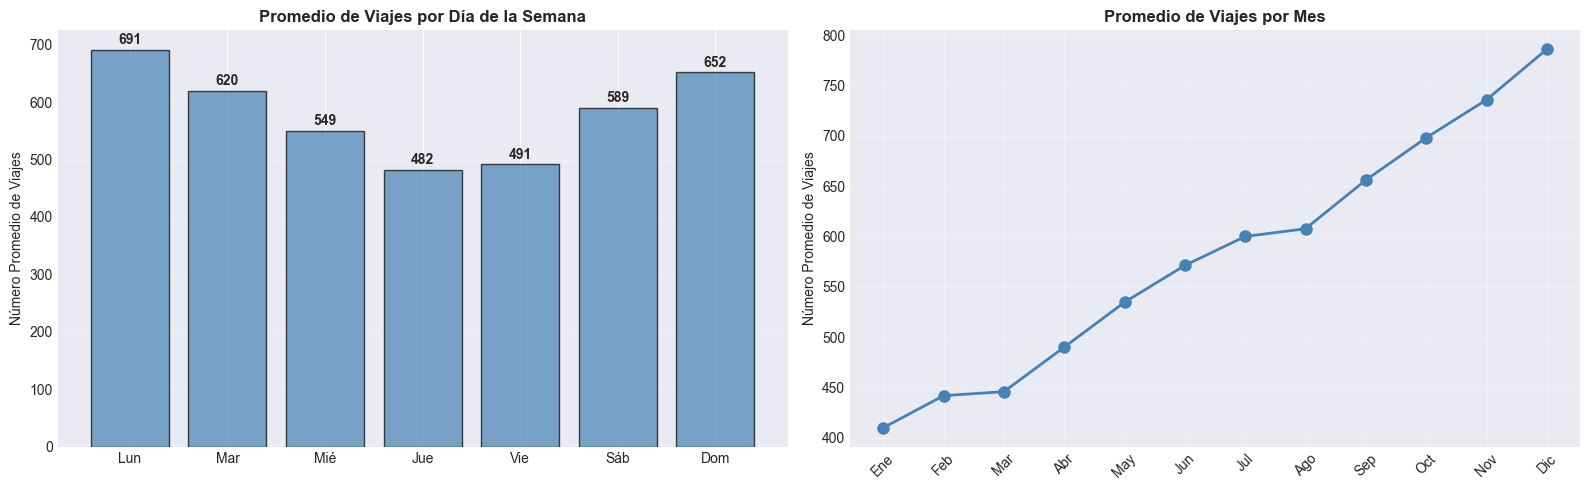


📅 Análisis de patrones:

Día con más viajes promedio: Monday (690.54 viajes)
Día con menos viajes promedio: Thursday (481.65 viajes)

Mes con más viajes promedio: Mes 12 (785.84 viajes)
Mes con menos viajes promedio: Mes 1 (409.90 viajes)


In [5]:
# Agregamos columnas auxiliares para análisis
df['dia_semana'] = df.index.dayofweek
df['nombre_dia'] = df.index.day_name()
df['mes'] = df.index.month
df['nombre_mes'] = df.index.month_name()

# Creamos visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Promedio por día de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
viajes_por_dia = df.groupby('nombre_dia')['viajes'].mean().reindex(dias_orden)

axes[0].bar(range(7), viajes_por_dia.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'], rotation=0)
axes[0].set_title('Promedio de Viajes por Día de la Semana', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Número Promedio de Viajes', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Añadimos los valores en las barras
for i, v in enumerate(viajes_por_dia.values):
    axes[0].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Promedio por mes
viajes_por_mes = df.groupby('mes')['viajes'].mean()
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

axes[1].plot(viajes_por_mes.index, viajes_por_mes.values, marker='o', 
             linewidth=2, markersize=8, color='steelblue')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(meses_nombres, rotation=45)
axes[1].set_title('Promedio de Viajes por Mes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Número Promedio de Viajes', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📅 Análisis de patrones:")
print(f"\nDía con más viajes promedio: {viajes_por_dia.idxmax()} ({viajes_por_dia.max():.2f} viajes)")
print(f"Día con menos viajes promedio: {viajes_por_dia.idxmin()} ({viajes_por_dia.min():.2f} viajes)")
print(f"\nMes con más viajes promedio: Mes {viajes_por_mes.idxmax()} ({viajes_por_mes.max():.2f} viajes)")
print(f"Mes con menos viajes promedio: Mes {viajes_por_mes.idxmin()} ({viajes_por_mes.min():.2f} viajes)")

## 6. Descomposición Aditiva de la Serie Temporal

### ¿Qué es la descomposición de series temporales?

La descomposición nos permite separar una serie temporal en sus componentes fundamentales:

**Modelo Aditivo:** `Y(t) = Tendencia(t) + Estacionalidad(t) + Residuo(t)`

### Componentes:

1. **Tendencia (Trend)**: 
   - Movimiento a largo plazo de la serie
   - Puede ser creciente, decreciente o constante
   - Representa el comportamiento general sin fluctuaciones

2. **Estacionalidad (Seasonal)**:
   - Patrones que se repiten en intervalos fijos
   - Ejemplo: más viajes los fines de semana, menos en invierno
   - En nuestro caso, esperamos ver patrones semanales

3. **Residuo (Residual)**:
   - Lo que queda después de remover tendencia y estacionalidad
   - Representa la variabilidad "aleatoria" o irregular
   - Incluye ruido y eventos no capturados por los otros componentes

### Parámetros importantes:

- `model='additive'`: Usamos modelo aditivo (los componentes se suman)
- `period=7`: Especificamos periodicidad semanal (7 días)
- `extrapolate_trend='freq'`: Extiende la tendencia en los extremos

In [6]:
# Aplicamos la descomposición aditiva
# period=7 porque esperamos un patrón semanal (7 días)
decomposition = seasonal_decompose(
    df['viajes'], 
    model='additive',  # Modelo aditivo: Y = Tendencia + Estacionalidad + Residuo
    period=7,          # Periodicidad semanal
    extrapolate_trend='freq'  # Extrapola la tendencia en los extremos
)

print("✅ Descomposición completada exitosamente")
print("\n📊 Componentes extraídos:")
print("1. Serie Original (Observed)")
print("2. Tendencia (Trend)")
print("3. Estacionalidad (Seasonal)")
print("4. Residuos (Residual)")

✅ Descomposición completada exitosamente

📊 Componentes extraídos:
1. Serie Original (Observed)
2. Tendencia (Trend)
3. Estacionalidad (Seasonal)
4. Residuos (Residual)


## 7. Visualización de la Descomposición

**¿Cómo interpretar cada gráfico?**

1. **Observed (Serie Original)**: Los datos tal como los observamos
2. **Trend (Tendencia)**: La dirección general de los datos a largo plazo
3. **Seasonal (Estacionalidad)**: El patrón repetitivo (sube y baja regularmente)
4. **Residual (Residuos)**: Lo que no se explica por tendencia ni estacionalidad

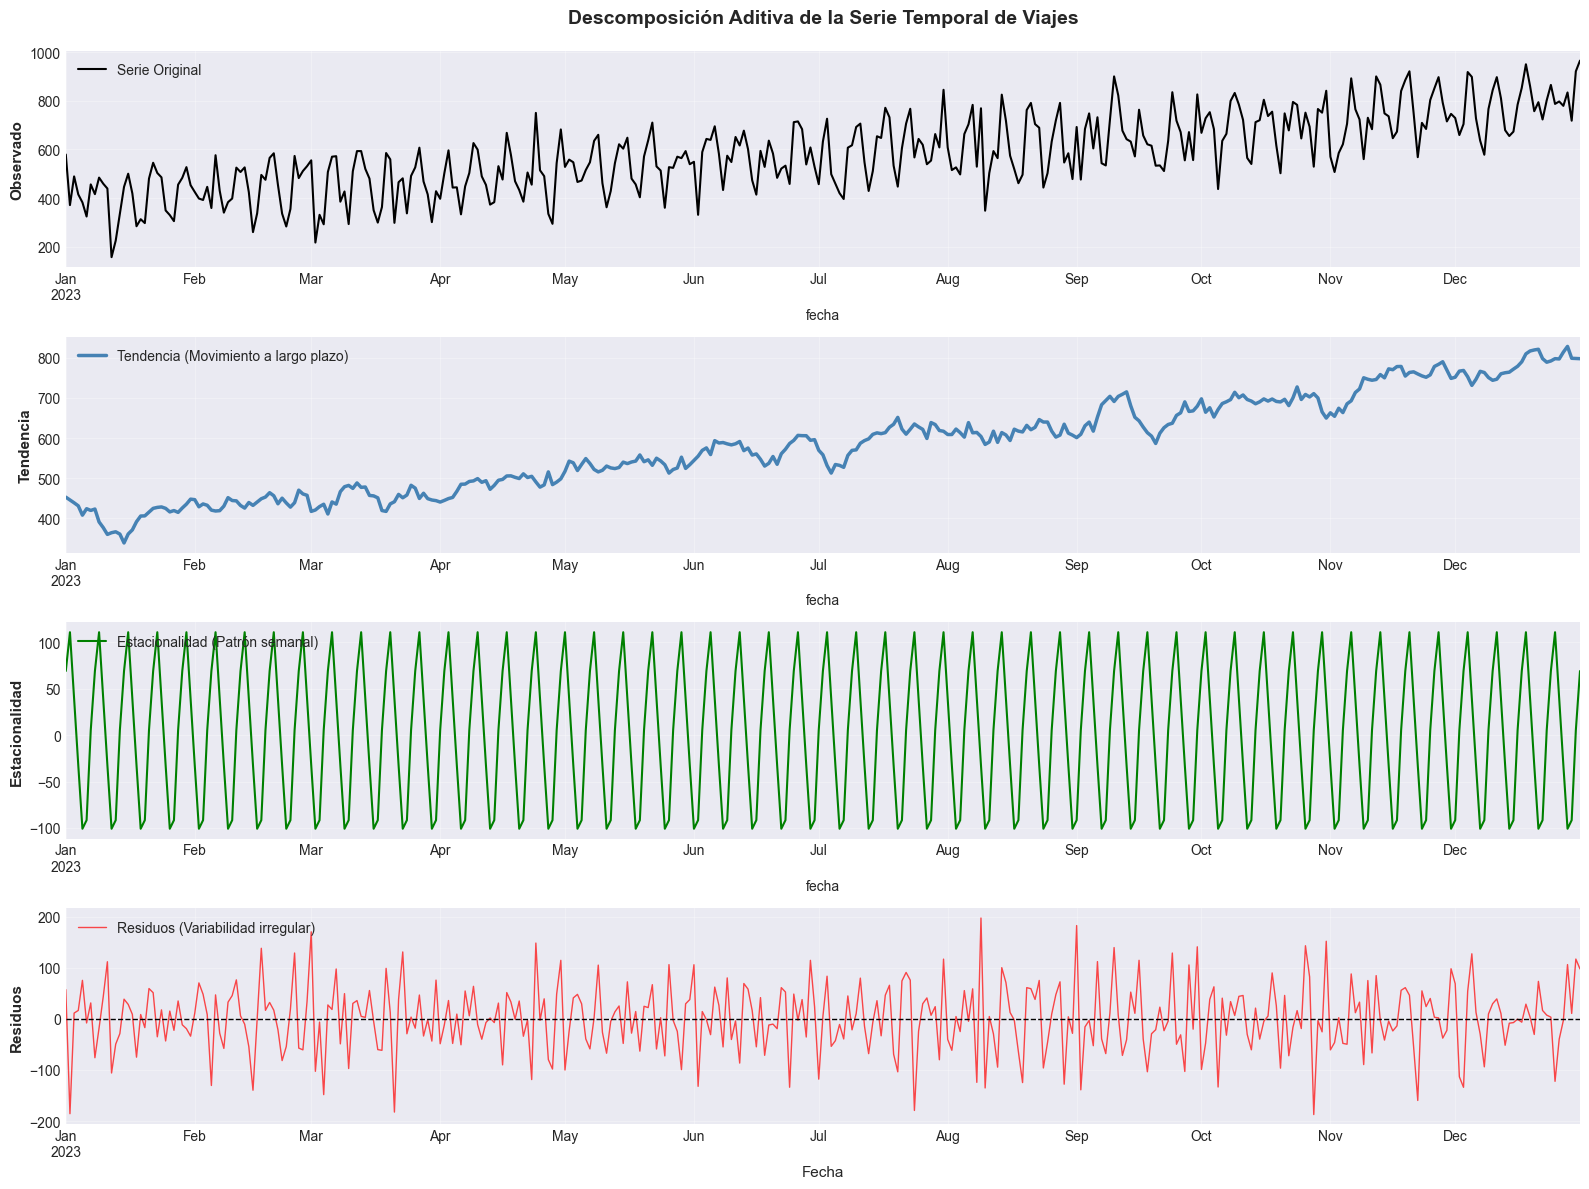

In [7]:
# Creamos una figura con los 4 componentes
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# 1. Serie Original
decomposition.observed.plot(ax=axes[0], color='black', linewidth=1.5)
axes[0].set_ylabel('Observado', fontsize=11, fontweight='bold')
axes[0].set_title('Descomposición Aditiva de la Serie Temporal de Viajes', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Serie Original'], loc='upper left')

# 2. Tendencia
decomposition.trend.plot(ax=axes[1], color='steelblue', linewidth=2.5)
axes[1].set_ylabel('Tendencia', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(['Tendencia (Movimiento a largo plazo)'], loc='upper left')

# 3. Estacionalidad
decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=1.5)
axes[2].set_ylabel('Estacionalidad', fontsize=11, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend(['Estacionalidad (Patrón semanal)'], loc='upper left')

# 4. Residuos
decomposition.resid.plot(ax=axes[3], color='red', linewidth=1, alpha=0.7)
axes[3].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[3].set_ylabel('Residuos', fontsize=11, fontweight='bold')
axes[3].set_xlabel('Fecha', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].legend(['Residuos (Variabilidad irregular)'], loc='upper left')

plt.tight_layout()
plt.show()

## 8. Análisis Detallado de Cada Componente

Ahora analizaremos cada componente individualmente para extraer insights específicos.

### 8.1 Análisis de la Tendencia

La tendencia nos muestra el comportamiento general de los viajes a lo largo del tiempo, eliminando las fluctuaciones de corto plazo.

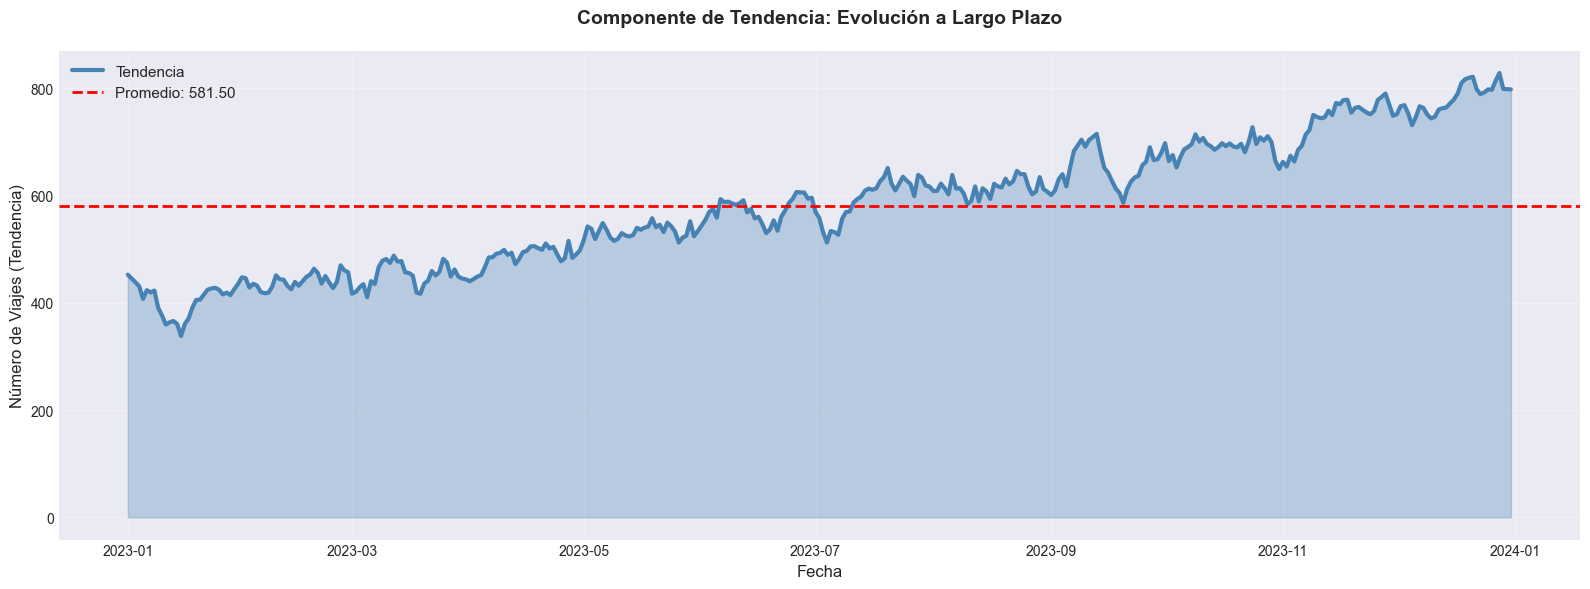


📈 Análisis de la Tendencia:
- Valor inicial: 452.55 viajes
- Valor final: 798.08 viajes
- Cambio total: 345.53 viajes
- Cambio porcentual: 76.35%
- Promedio de la tendencia: 581.50 viajes

✅ La tendencia es CRECIENTE: el número de viajes aumenta con el tiempo


In [8]:
# Extraemos la tendencia
tendencia = decomposition.trend.dropna()

# Visualización detallada de la tendencia
plt.figure(figsize=(16, 6))
plt.plot(tendencia.index, tendencia.values, linewidth=3, color='steelblue', label='Tendencia')
plt.fill_between(tendencia.index, tendencia.values, alpha=0.3, color='steelblue')

# Añadimos líneas de referencia
plt.axhline(y=tendencia.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Promedio: {tendencia.mean():.2f}')

plt.title('Componente de Tendencia: Evolución a Largo Plazo', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Viajes (Tendencia)', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas de la tendencia
print("\n📈 Análisis de la Tendencia:")
print(f"- Valor inicial: {tendencia.iloc[0]:.2f} viajes")
print(f"- Valor final: {tendencia.iloc[-1]:.2f} viajes")
print(f"- Cambio total: {tendencia.iloc[-1] - tendencia.iloc[0]:.2f} viajes")
print(f"- Cambio porcentual: {((tendencia.iloc[-1] / tendencia.iloc[0]) - 1) * 100:.2f}%")
print(f"- Promedio de la tendencia: {tendencia.mean():.2f} viajes")

# Calculamos si hay crecimiento o decrecimiento
if tendencia.iloc[-1] > tendencia.iloc[0]:
    print("\n✅ La tendencia es CRECIENTE: el número de viajes aumenta con el tiempo")
elif tendencia.iloc[-1] < tendencia.iloc[0]:
    print("\n📉 La tendencia es DECRECIENTE: el número de viajes disminuye con el tiempo")
else:
    print("\n➡️ La tendencia es ESTABLE: el número de viajes se mantiene constante")

### 8.2 Análisis de la Estacionalidad

La estacionalidad captura los patrones que se repiten regularmente. En nuestro caso, esperamos ver variaciones semanales.

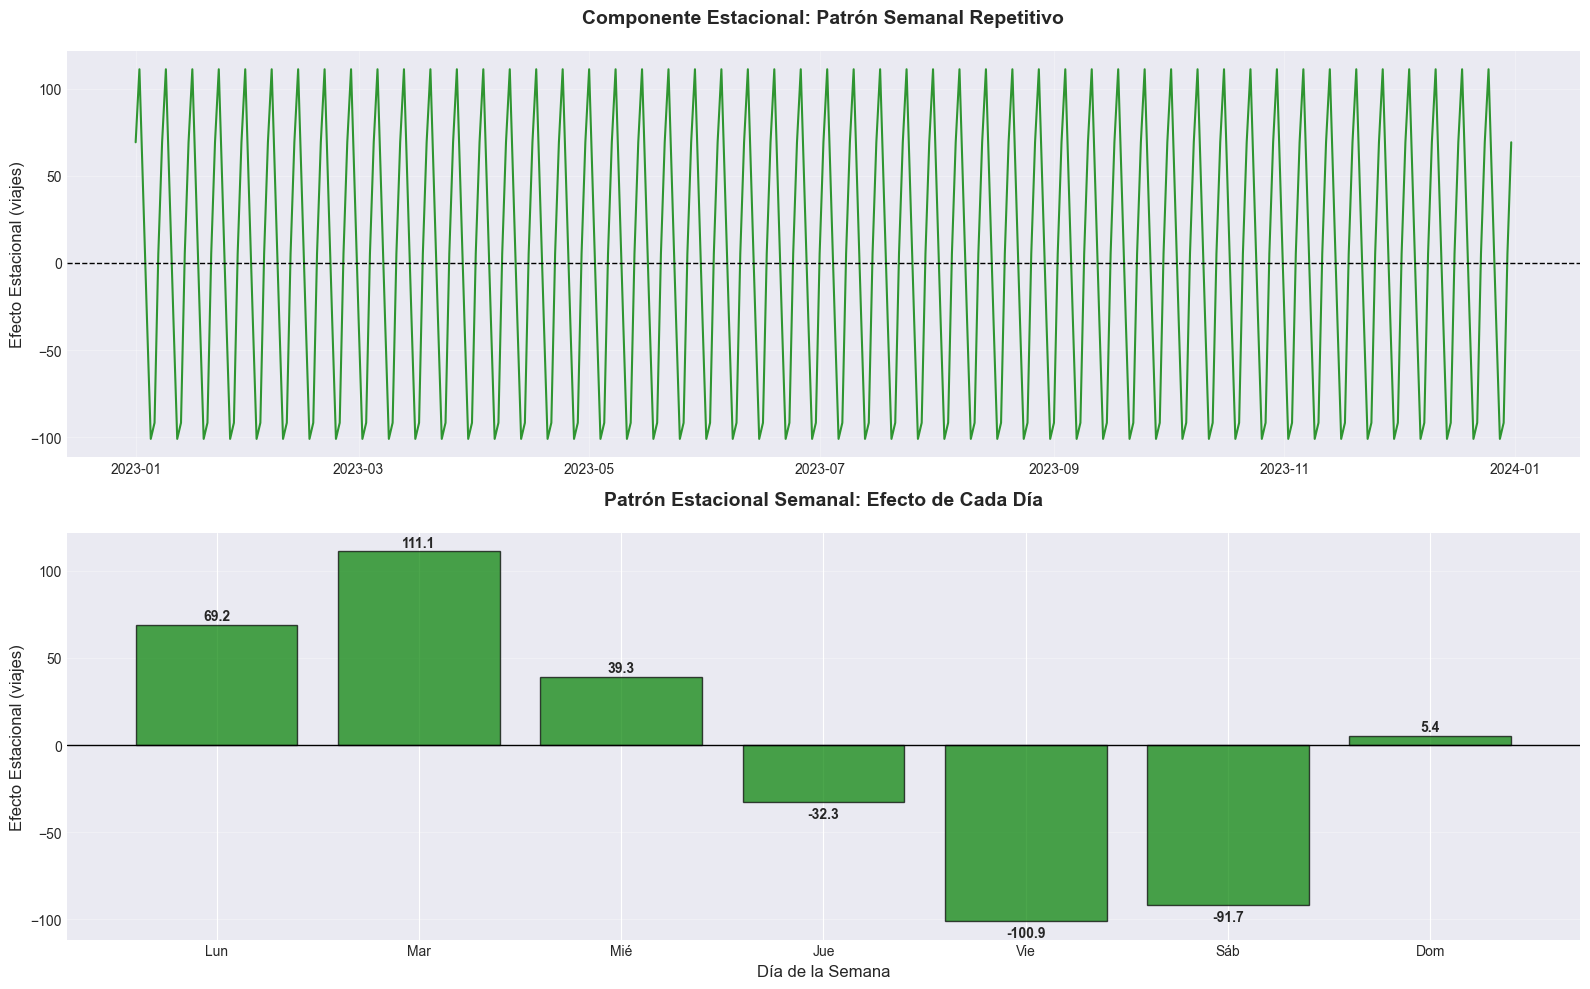


🔄 Análisis de la Estacionalidad:

Rango del efecto estacional: -100.93 a 111.09 viajes
Amplitud estacional: 212.02 viajes

Efecto por día de la semana:
  Lun: +69.20 viajes (más viajes)
  Mar: +111.09 viajes (más viajes)
  Mié: +39.26 viajes (más viajes)
  Jue: -32.33 viajes (menos viajes)
  Vie: -100.93 viajes (menos viajes)
  Sáb: -91.70 viajes (menos viajes)
  Dom: +5.41 viajes (más viajes)

✅ Día con mayor efecto positivo: Mar (+111.09 viajes)
📉 Día con mayor efecto negativo: Vie (-100.93 viajes)


In [9]:
# Extraemos la estacionalidad
estacionalidad = decomposition.seasonal

# Creamos visualizaciones
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Patrón estacional completo
axes[0].plot(estacionalidad.index, estacionalidad.values, 
             linewidth=1.5, color='green', alpha=0.8)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('Componente Estacional: Patrón Semanal Repetitivo', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_ylabel('Efecto Estacional (viajes)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Patrón estacional promedio por día de la semana
# Extraemos un ciclo completo (primeros 7 días únicos)
patron_semanal = estacionalidad.iloc[:7].values
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

axes[1].bar(range(7), patron_semanal, color='green', alpha=0.7, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dias)
axes[1].set_title('Patrón Estacional Semanal: Efecto de Cada Día', 
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_ylabel('Efecto Estacional (viajes)', fontsize=12)
axes[1].set_xlabel('Día de la Semana', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# Añadimos valores en las barras
for i, v in enumerate(patron_semanal):
    axes[1].text(i, v + (1 if v > 0 else -3), f'{v:.1f}', 
                ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis del patrón estacional
print("\n🔄 Análisis de la Estacionalidad:")
print(f"\nRango del efecto estacional: {estacionalidad.min():.2f} a {estacionalidad.max():.2f} viajes")
print(f"Amplitud estacional: {estacionalidad.max() - estacionalidad.min():.2f} viajes")
print("\nEfecto por día de la semana:")
for i, dia in enumerate(dias):
    efecto = patron_semanal[i]
    signo = "+" if efecto >= 0 else ""
    print(f"  {dia}: {signo}{efecto:.2f} viajes {'(más viajes)' if efecto > 0 else '(menos viajes)'}")

# Identificamos días con mayor y menor efecto
dia_max = dias[np.argmax(patron_semanal)]
dia_min = dias[np.argmin(patron_semanal)]
print(f"\n✅ Día con mayor efecto positivo: {dia_max} (+{patron_semanal[np.argmax(patron_semanal)]:.2f} viajes)")
print(f"📉 Día con mayor efecto negativo: {dia_min} ({patron_semanal[np.argmin(patron_semanal)]:.2f} viajes)")

### 8.3 Análisis de los Residuos

Los residuos representan la parte "inexplicada" de la serie después de remover tendencia y estacionalidad. 

**Características de buenos residuos:**
- Deben estar centrados alrededor de cero
- Deben tener varianza constante
- No deben mostrar patrones obvios
- Idealmente deben seguir una distribución normal

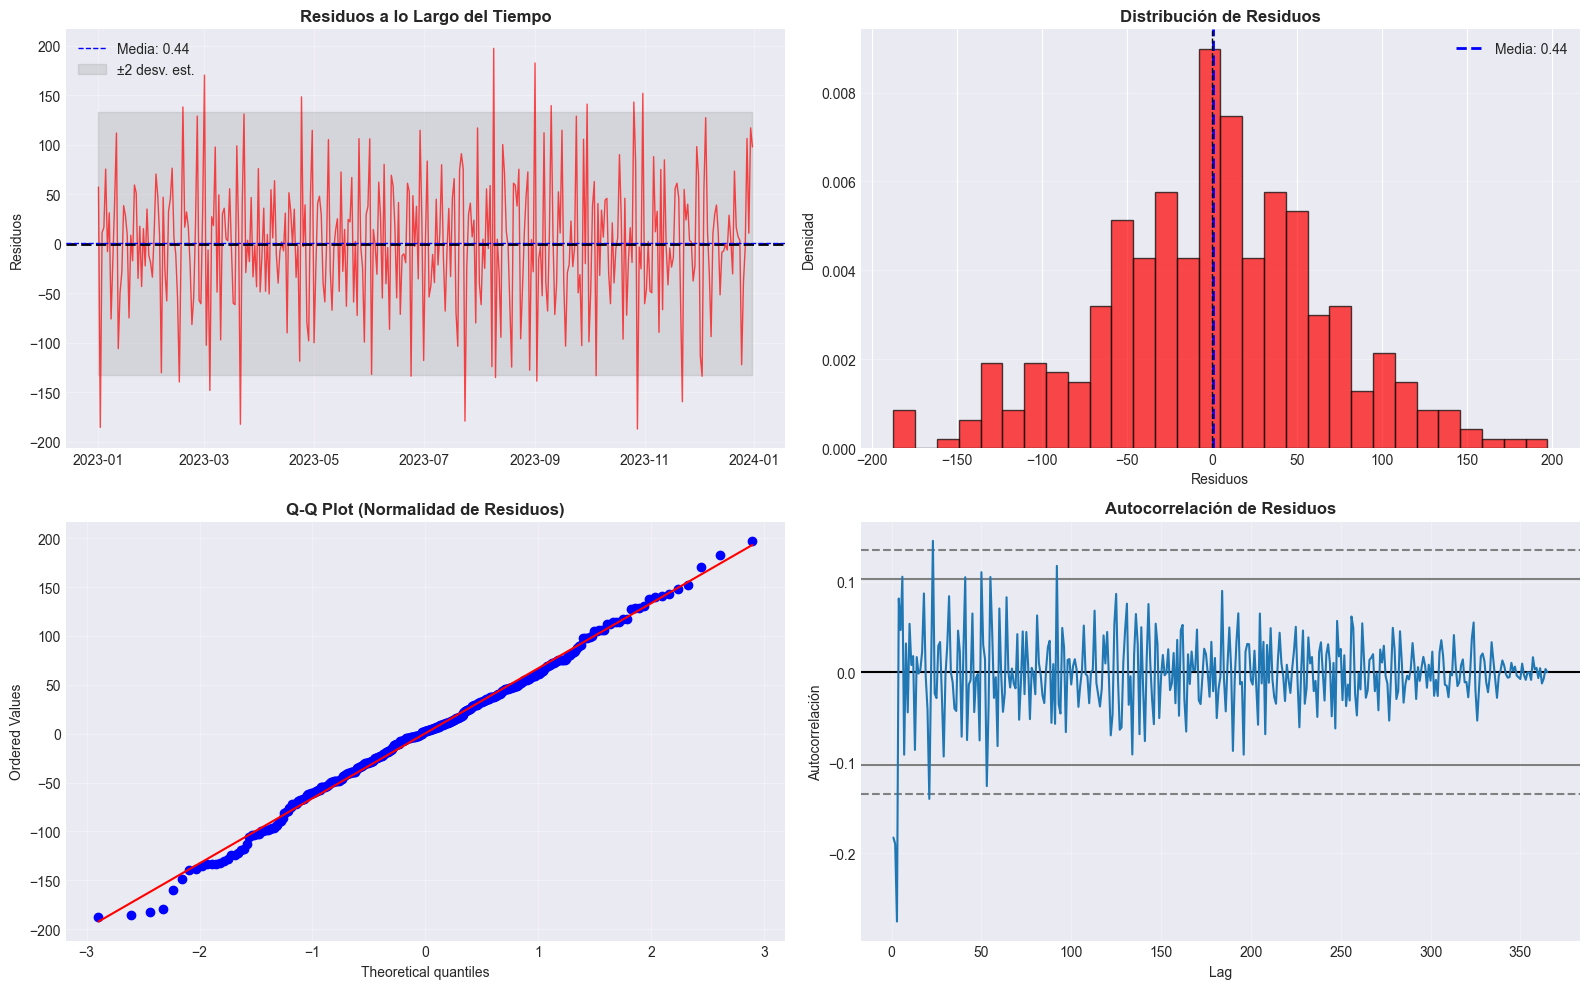


🔬 Análisis de Residuos:

Estadísticas descriptivas:
- Media: 0.4429 (idealmente debería ser ~0)
- Desviación estándar: 66.40
- Mínimo: -187.27
- Máximo: 197.33
- Rango: 384.60

Test de Shapiro-Wilk (normalidad):
- Estadístico: 0.9949
- p-valor: 0.2700
✅ Los residuos siguen aproximadamente una distribución normal (p > 0.05)

Porcentaje de residuos dentro de ±2σ: 94.25%
(En una distribución normal, esperaríamos ~95%)


In [10]:
# Extraemos los residuos
residuos = decomposition.resid.dropna()

# Creamos visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Serie temporal de residuos
axes[0, 0].plot(residuos.index, residuos.values, linewidth=1, color='red', alpha=0.7)
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 0].axhline(y=residuos.mean(), color='blue', linestyle='--', 
                   linewidth=1, label=f'Media: {residuos.mean():.2f}')
axes[0, 0].fill_between(residuos.index, 
                        residuos.mean() - 2*residuos.std(),
                        residuos.mean() + 2*residuos.std(),
                        alpha=0.2, color='gray', label='±2 desv. est.')
axes[0, 0].set_title('Residuos a lo Largo del Tiempo', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Histograma de residuos
axes[0, 1].hist(residuos, bins=30, color='red', alpha=0.7, edgecolor='black', density=True)
axes[0, 1].axvline(x=residuos.mean(), color='blue', linestyle='--', 
                   linewidth=2, label=f'Media: {residuos.mean():.2f}')
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Residuos', fontsize=10)
axes[0, 1].set_ylabel('Densidad', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Gráfico 3: Q-Q plot (comparación con distribución normal)
from scipy import stats
stats.probplot(residuos, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Autocorrelación de residuos
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuos, ax=axes[1, 1])
axes[1, 1].set_title('Autocorrelación de Residuos', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Lag', fontsize=10)
axes[1, 1].set_ylabel('Autocorrelación', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de los residuos
print("\n🔬 Análisis de Residuos:")
print(f"\nEstadísticas descriptivas:")
print(f"- Media: {residuos.mean():.4f} (idealmente debería ser ~0)")
print(f"- Desviación estándar: {residuos.std():.2f}")
print(f"- Mínimo: {residuos.min():.2f}")
print(f"- Máximo: {residuos.max():.2f}")
print(f"- Rango: {residuos.max() - residuos.min():.2f}")

# Test de normalidad
statistic, p_value = stats.shapiro(residuos)
print(f"\nTest de Shapiro-Wilk (normalidad):")
print(f"- Estadístico: {statistic:.4f}")
print(f"- p-valor: {p_value:.4f}")
if p_value > 0.05:
    print("✅ Los residuos siguen aproximadamente una distribución normal (p > 0.05)")
else:
    print("⚠️ Los residuos NO siguen una distribución normal (p < 0.05)")

# Porcentaje de residuos dentro de ±2 desviaciones estándar
limite_sup = residuos.mean() + 2*residuos.std()
limite_inf = residuos.mean() - 2*residuos.std()
dentro_limites = ((residuos >= limite_inf) & (residuos <= limite_sup)).sum()
porcentaje = (dentro_limites / len(residuos)) * 100
print(f"\nPorcentaje de residuos dentro de ±2σ: {porcentaje:.2f}%")
print("(En una distribución normal, esperaríamos ~95%)")

## 9. Verificación de la Descomposición

Verificamos que la descomposición es correcta sumando los componentes.

**Modelo Aditivo:** `Observado = Tendencia + Estacionalidad + Residuos`

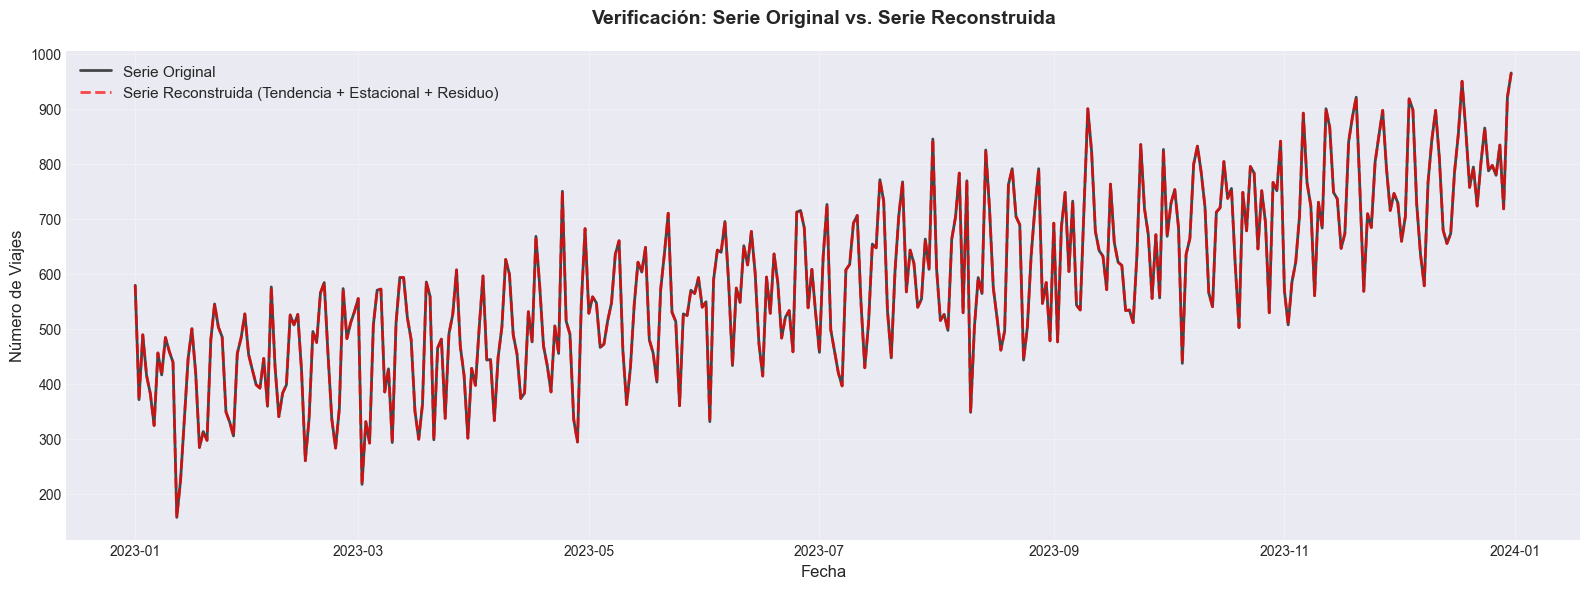


✅ Verificación de la descomposición:
- Diferencia promedio: 0.0000000000
- Diferencia máxima absoluta: 0.0000000000

🎯 La diferencia es prácticamente cero, confirmando que:
   Serie Original = Tendencia + Estacionalidad + Residuos


In [11]:
# Reconstruimos la serie sumando los componentes
serie_reconstruida = decomposition.trend + decomposition.seasonal + decomposition.resid

# Visualización comparativa
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['viajes'], label='Serie Original', 
         linewidth=2, alpha=0.7, color='black')
plt.plot(serie_reconstruida.index, serie_reconstruida.values, 
         label='Serie Reconstruida (Tendencia + Estacional + Residuo)', 
         linewidth=2, linestyle='--', alpha=0.7, color='red')
plt.title('Verificación: Serie Original vs. Serie Reconstruida', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculamos el error entre original y reconstruida
diferencia = (df['viajes'] - serie_reconstruida).dropna()
print("\n✅ Verificación de la descomposición:")
print(f"- Diferencia promedio: {diferencia.mean():.10f}")
print(f"- Diferencia máxima absoluta: {abs(diferencia).max():.10f}")
print("\n🎯 La diferencia es prácticamente cero, confirmando que:")
print("   Serie Original = Tendencia + Estacionalidad + Residuos")

## 10. Resumen y Conclusiones

### ¿Qué aprendimos de esta descomposición?

In [12]:
# Calculamos algunas métricas finales
varianza_original = df['viajes'].var()
varianza_tendencia = decomposition.trend.dropna().var()
varianza_estacional = decomposition.seasonal.var()
varianza_residuos = decomposition.resid.dropna().var()

# Proporción de varianza explicada
var_explicada_tendencia = (varianza_tendencia / varianza_original) * 100
var_explicada_estacional = (varianza_estacional / varianza_original) * 100
var_explicada_residuos = (varianza_residuos / varianza_original) * 100

print("="*70)
print("📊 RESUMEN DE LA DESCOMPOSICIÓN DE SERIES TEMPORALES")
print("="*70)

print("\n🎯 COMPONENTE 1: TENDENCIA")
print("-" * 70)
print(f"  • Representa el comportamiento a largo plazo")
print(f"  • Varianza explicada: {var_explicada_tendencia:.2f}%")
print(f"  • Cambio total: {decomposition.trend.dropna().iloc[-1] - decomposition.trend.dropna().iloc[0]:.2f} viajes")
if decomposition.trend.dropna().iloc[-1] > decomposition.trend.dropna().iloc[0]:
    print(f"  • Dirección: CRECIENTE ↗️")
else:
    print(f"  • Dirección: DECRECIENTE ↘️")

print("\n🔄 COMPONENTE 2: ESTACIONALIDAD")
print("-" * 70)
print(f"  • Representa el patrón semanal repetitivo")
print(f"  • Varianza explicada: {var_explicada_estacional:.2f}%")
print(f"  • Amplitud: {decomposition.seasonal.max() - decomposition.seasonal.min():.2f} viajes")
print(f"  • Período: 7 días (patrón semanal)")

print("\n🎲 COMPONENTE 3: RESIDUOS")
print("-" * 70)
print(f"  • Representa la variabilidad no explicada")
print(f"  • Varianza explicada: {var_explicada_residuos:.2f}%")
print(f"  • Desviación estándar: {decomposition.resid.dropna().std():.2f} viajes")
print(f"  • Rango: [{decomposition.resid.dropna().min():.2f}, {decomposition.resid.dropna().max():.2f}]")

print("\n📈 INTERPRETACIÓN GENERAL")
print("="*70)
print(f"1. La serie de viajes de Cityscoot muestra una clara estructura temporal")
print(f"2. La tendencia explica el {var_explicada_tendencia:.1f}% de la variabilidad")
print(f"3. La estacionalidad semanal es evidente con un {var_explicada_estacional:.1f}% de explicación")
print(f"4. Los residuos ({var_explicada_residuos:.1f}%) incluyen eventos aleatorios e irregulares")

print("\n💡 APLICACIONES PRÁCTICAS")
print("="*70)
print("• PRONÓSTICO: Podemos predecir viajes futuros usando tendencia + estacionalidad")
print("• PLANIFICACIÓN: Identificar días con mayor/menor demanda para asignar recursos")
print("• DETECCIÓN DE ANOMALÍAS: Residuos grandes indican eventos inusuales")
print("• ESTRATEGIA: Entender patrones para optimizar campañas de marketing")

print("\n" + "="*70)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*70)

📊 RESUMEN DE LA DESCOMPOSICIÓN DE SERIES TEMPORALES

🎯 COMPONENTE 1: TENDENCIA
----------------------------------------------------------------------
  • Representa el comportamiento a largo plazo
  • Varianza explicada: 58.75%
  • Cambio total: 345.53 viajes
  • Dirección: CRECIENTE ↗️

🔄 COMPONENTE 2: ESTACIONALIDAD
----------------------------------------------------------------------
  • Representa el patrón semanal repetitivo
  • Varianza explicada: 22.65%
  • Amplitud: 212.02 viajes
  • Período: 7 días (patrón semanal)

🎲 COMPONENTE 3: RESIDUOS
----------------------------------------------------------------------
  • Representa la variabilidad no explicada
  • Varianza explicada: 18.19%
  • Desviación estándar: 66.40 viajes
  • Rango: [-187.27, 197.33]

📈 INTERPRETACIÓN GENERAL
1. La serie de viajes de Cityscoot muestra una clara estructura temporal
2. La tendencia explica el 58.7% de la variabilidad
3. La estacionalidad semanal es evidente con un 22.7% de explicación
4. Los res

## 11. Ejercicios Adicionales (Opcional)

Para profundizar en el análisis, puedes explorar:

1. **Descomposición Multiplicativa**: 
   - Cambiar `model='multiplicative'` y comparar resultados
   - Útil cuando la amplitud de las fluctuaciones cambia con el nivel de la serie

2. **Diferentes Períodos**:
   - Probar `period=30` para capturar estacionalidad mensual
   - Probar `period=365` si tuviéramos datos de varios años

3. **Análisis de Correlación**:
   - Investigar cómo las variables externas (temperatura, lluvia, eventos) 
     afectan los residuos

4. **Pronóstico Simple**:
   - Usar la tendencia y estacionalidad para predecir los próximos 7 días

5. **Detección de Outliers**:
   - Identificar días con residuos extremos (>3σ)
   - Investigar qué causó esas anomalías

In [13]:
# Espacio para experimentación adicional
# ¡Anímate a modificar el código y explorar más!